# Sentiment Analysis: Example 1
In this first simple example, I will use [this dataset](https://www.kaggle.com/datasets/sbhatti/financial-sentiment-analysis) from *Malo, Pekka, et al. "Good debt or bad debt: Detecting semantic orientations in economic texts." Journal of the Association for Information Science and Technology 65.4 (2014): 782-796.*

## Extracting sentiments

We will use pandas for data handling, and visualization and transformers machine library, the workhorse for working with large language models. 

So, first, go ahead and install these three Python libraries:

```pip install pandas, transformers```

We need to get the data with pandas' `read_csv()` function.

In [48]:
import pandas as pd

In [29]:
df = pd.read_csv('../data/data_labelled.csv', usecols = ['Sentence']) # get "Sentence" column
df.to_csv('../data/data_unlabelled.csv')  # Save it in the same folder

In the above cell, I first read the data store it in memory wiht `df`. While reading the data, I use the optional argument `usecols=['Sentence']` to extract the column I am interested in (i.e. the sentences I want to work on). I then saved it in the same folder with a different file name. To see what is inside the data

In [15]:
df

Sentence
0     The GeoSolutions technology will leverage Bene...
1     $ESI on lows, down $1.50 to $2.50 BK a real po...
2     For the last quarter of 2010 , Componenta 's n...
3     According to the Finnish-Russian Chamber of Co...
4     The Swedish buyout firm has sold its remaining...
...                                                 ...
5837  RISING costs have forced packaging producer Hu...
5838  Nordic Walking was first used as a summer trai...
5839  According shipping company Viking Line , the E...
5840  In the building and home improvement trade , s...
5841  HELSINKI AFX - KCI Konecranes said it has won ...

[5842 rows x 1 columns]

To see how many sentences exist in the data frame, use the `len` Python function. We have 5842 sentences.

In [16]:
print(len(df))

5842


However, for this exercise, let's work on the first 100 sentences to save on computing resources.

In [17]:
df = df[:100]
print(len(df))

100


We import `pipeline` and `logging` from transformers to predict sentiment and disable some warning texts while predicting respectively.

In [18]:
from transformers import pipeline
from transformers.utils import logging
logging.set_verbosity_error()

The following code snippet instantiates the model. We provide the task (i.e. `sentiment-analysis` and the model (i.e. `distilbert-base-uncased-finetuned-sst-2-english`). The instantiated model is stored in the object `classifier`

In [19]:
classifier = pipeline("sentiment-analysis",
                    model='distilbert-base-uncased-finetuned-sst-2-english')

Finally, we run the model by providing it with the text we want to extract sentiment on. In the following cell, we provide the sentences separately. The output of the model will be stored in the `outputs` object.

In [20]:
outputs= classifier(
    [sentence for sentence in df['Sentence'] ]
)

The output is a dictionary. Let's see the first 5 predicted outputs and their score.

In [23]:
outputs[0:5]

[{'label': 'POSITIVE', 'score': 0.9991747736930847},
 {'label': 'NEGATIVE', 'score': 0.9931260347366333},
 {'label': 'NEGATIVE', 'score': 0.9939583539962769},
 {'label': 'POSITIVE', 'score': 0.9968819618225098},
 {'label': 'NEGATIVE', 'score': 0.991634726524353}]

More conviniently, we can use pandas to see the label and score of the output in a tabular format.

In [25]:
df = pd.DataFrame(outputs)
print(df)

       label     score
0   POSITIVE  0.999175
1   NEGATIVE  0.993126
2   NEGATIVE  0.993958
3   POSITIVE  0.996882
4   NEGATIVE  0.991635
..       ...       ...
95  NEGATIVE  0.999630
96  NEGATIVE  0.527705
97  NEGATIVE  0.971622
98  NEGATIVE  0.998728
99  NEGATIVE  0.997273

[100 rows x 2 columns]


## Visualizing sentiments
We will impoloy `pandas`'s `plot` package to see the results graphically. First let's get the variables for the axis.

In [76]:
freq = df['label'].value_counts().sort_values()
print(freq)

label
POSITIVE    31
NEGATIVE    69
Name: count, dtype: int64


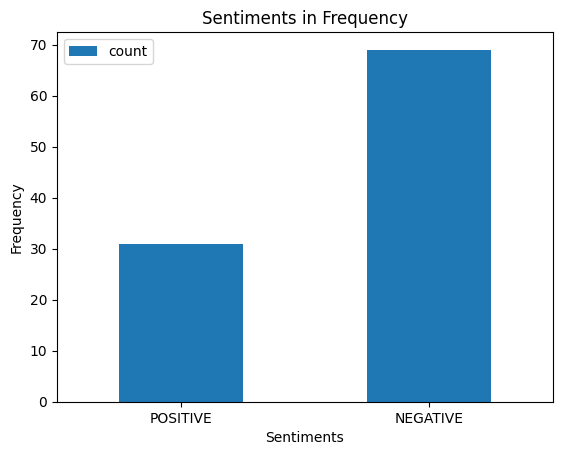

In [77]:

ax = freq.plot.bar(x='label', y='count', 
                   rot=0, title="Sentiments in Frequency")
ax.legend(loc=2)  
ax.set_xlabel("Sentiments")
ax.set_ylabel("Frequency");

The result can also be shown with a percentage rather than frequency.

In [71]:
perc = (freq / len(df)).round(2).cumsum() * 100

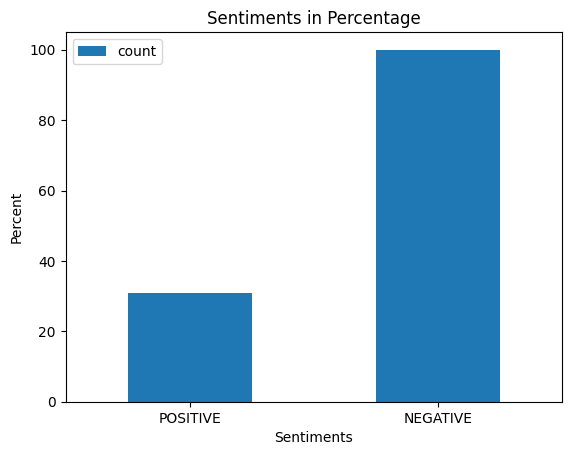

In [78]:
ax = perc.plot.bar(x='label', y='count', 
                   rot=0, title="Sentiments in Percentage")
ax.legend(loc=2)  
ax.set_xlabel("Sentiments")
ax.set_ylabel("Percent");

In example 2, we will see how we can also include neutral in the prediction.